In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


with functions

to crop image for hands

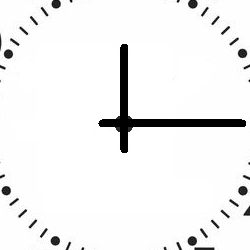

True

In [ ]:
import cv2#croppppppppppppppppping
from google.colab.patches import cv2_imshow
# Load the image
image = cv2.imread('/content/2-1.jpg')

# Define the coordinates of the top-left and bottom-right corners of the region you want to crop
x1, y1 = 100, 100  # Top-left corner
x2, y2 = 350, 350  # Bottom-right corner

# Crop the image
cropped_image = image[y1:y2, x1:x2]

# Display the cropped image
cv2_imshow( cropped_image)
cv2.imwrite('croped.jpg' ,cropped_image )
# cv2.waitKey(0)
# cv2.destroyAllWindows()


# Q1

In [ ]:
import cv2
import numpy as np
import math

# Function to convert the angle between clock hands to time
def angle_to_time(angle):
    total_minutes = (angle % (2 * math.pi)) / (2 * math.pi) * 60
    hours = total_minutes // 60
    minutes = total_minutes % 60
    return int(hours), int(minutes)


file = 'data/data/2-1.jpg'

# Load the image
image = cv2.imread(file)

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Canny edge detection
edges = cv2.Canny(gray, 50, 150, apertureSize=3)

if file == 'data/data/2-1.jpg':
    thr = 105
if file == 'data/data/2-2.jpg':
    thr = 122

# Use Hough Line Transform to detect lines
lines = cv2.HoughLines(edges, 1, np.pi / 180, threshold=thr)

# Draw the lines on the clock image
if file == 'data/data/2-1.jpg':
    for line in lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 - 500 * (-b))
        y1 = int(y0 - 100 * (a))
        x2 = int(x0 - 227 * (-b))
        y2 = int(y0 + 217 * (a))
        cv2.line(image, (x1, y1), (x2, y2), (0, 0, 255), 2)

if file == 'data/data/2-2.jpg':
    for line in lines:
#         print('img-2')
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 - 220 * (-b))
        y1 = int(y0 + 227 * (a))
        x2 = int(x0 +  250 * (-b))
        y2 = int(y0 + 350 * (a))
        cv2.line(image, (x1, y1), (x2, y2), (0, 0, 255), 2)

# Identify the longest lines as clock hands
longest_lines = sorted(lines, key=lambda x: x[0][1], reverse=True)[:2]
print(len(longest_lines))

# Find the intersection of the longest lines
rho1, theta1 = longest_lines[0][0]
rho2, theta2 = longest_lines[1][0]
A = np.array([[np.cos(theta1), np.sin(theta1)],
              [np.cos(theta2), np.sin(theta2)]])
b = np.array([rho1, rho2])
intersection = np.linalg.solve(A, b)
print(intersection)


# Draw the coordinate axes with the origin at the intersection
pt1_x = int(intersection[0])
pt1_y = int(intersection[1] - 100)
pt2_x = int(intersection[0])
pt2_y = int(intersection[1] + 100)
# cv2.line(image, (pt1_x, pt1_y), (pt2_x, pt2_y), (0, 255, 0), 2)

pt3_x = int(intersection[0] - 100)
pt3_y = int(intersection[1])
pt4_x = int(intersection[0] + 100)
pt4_y = int(intersection[1])
# cv2.line(image, (pt3_x, pt3_y), (pt4_x, pt4_y), (0, 255, 0), 2)

x, y = map(int, intersection)  # Convert the point to integer coordinates

# Draw a red dot at the intersection point
cv2.circle(image, (x, y), 5, (255, 255, 143), 2)  # -1 indicates a filled circle


# cv2.circle(image, (pt1_x, pt1_y), 5, (255, 255, 143), -1)  # -1 indicates a filled circle
# Calculate the angles of the clock hands with respect to the y-axis
angle1 = math.atan2(pt1_x - intersection[0], pt1_y - intersection[1])
angle2 = math.atan2(pt2_x - intersection[0], pt2_y - intersection[1])

# Convert angles to degrees
angle1_degrees = math.degrees(angle1)
angle2_degrees = math.degrees(angle2)
print(angle1_degrees)
print(angle2_degrees)
# Ensure the angles are in the anti-clockwise direction
# if angle1_degrees < 0:
#     angle1_degrees += 360
# if angle2_degrees < 0:
#     angle2_degrees += 360
# Display the angles
print("Angle of hour hand:", angle1_degrees)
print("Angle of minute hand:", angle2_degrees)

# Convert angles to time using the provided function
hour1, minute1 = angle_to_time(angle1)
hour2, minute2 = angle_to_time(angle2)

# Display the time
print(f"Time of hour hand: {hour1}:{minute1}")
print(f"Time of minute hand: {hour2}:{minute2}")

# Display the clock image with detected lines and coordinate axes
cv2.imshow("det-lines", image)

cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
# from google.colab.patches import cv2_imshow

In this updated code, we filter the lines based on their orientation relative to the clock's center. This ensures that only the lines on one side and direction of the clock hands are considered. Additionally, the clock hands are drawn on the image for visualization.

## q2

In [ ]:
from PIL import Image
from google.colab.patches import cv2_imshow
import cv2
# Open the image
image = Image.open("/content/1-4.jpg")

# Define the coordinates of the top-left and bottom-right corners of the patch you want to crop
left = 340  # x-coordinate of the top-left corner
top = 60   # y-coordinate of the top-left corner
right = 440  # x-coordinate of the bottom-right corner
bottom = 150  # y-coordinate of the bottom-right corner

# Crop the patch
patch = image.crop((left, top, right, bottom))

# Save the cropped patch
# cv2_imshow(patch)
patch.save("cropped_patch.jpg")

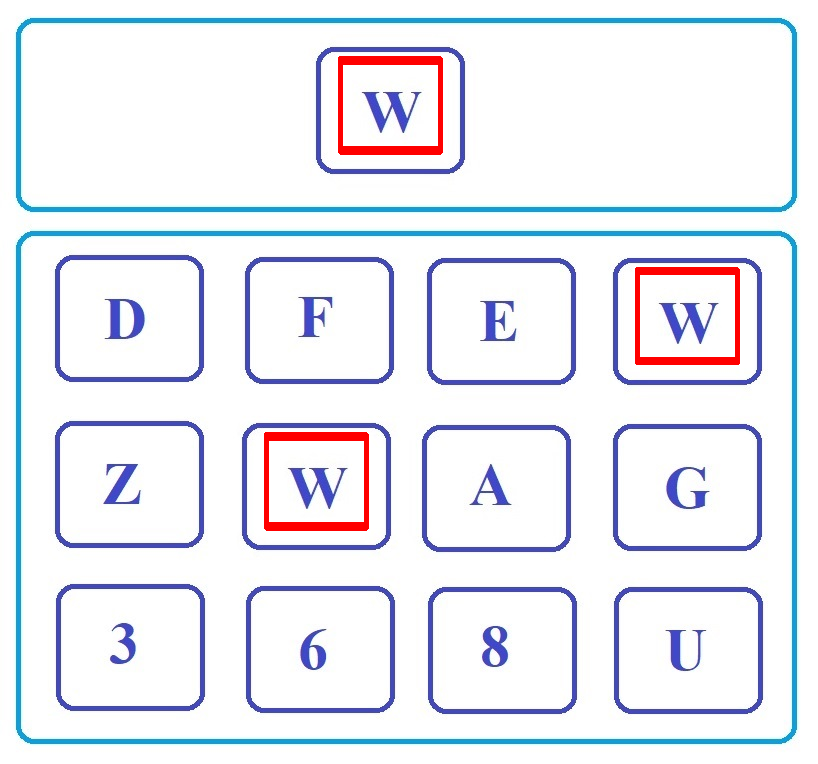

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img_rgb = cv.imread('/content/1-4.jpg')
assert img_rgb is not None, "file could not be read, check with os.path.exists()"
img_gray = cv.cvtColor(img_rgb, cv.COLOR_BGR2GRAY)
template = cv.imread('/content/cropped_patch.jpg', cv.IMREAD_GRAYSCALE)
assert template is not None, "file could not be read, check with os.path.exists()"
w, h = template.shape[::-1]
res = cv.matchTemplate(img_gray,template,cv.TM_CCOEFF_NORMED)
threshold = 0.8
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
 cv.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)
cv.imwrite('res.png',img_rgb)
cv2_imshow(img_rgb)

## Q3

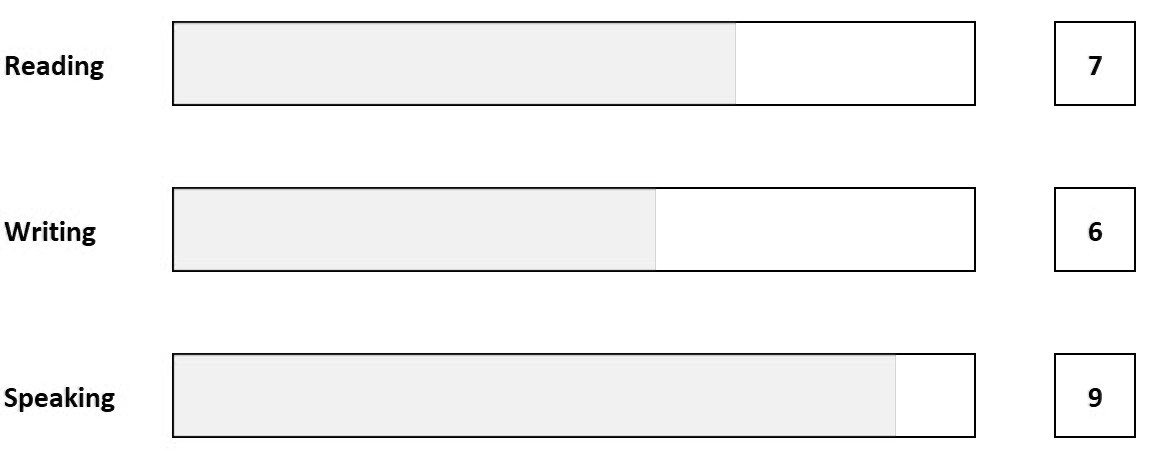

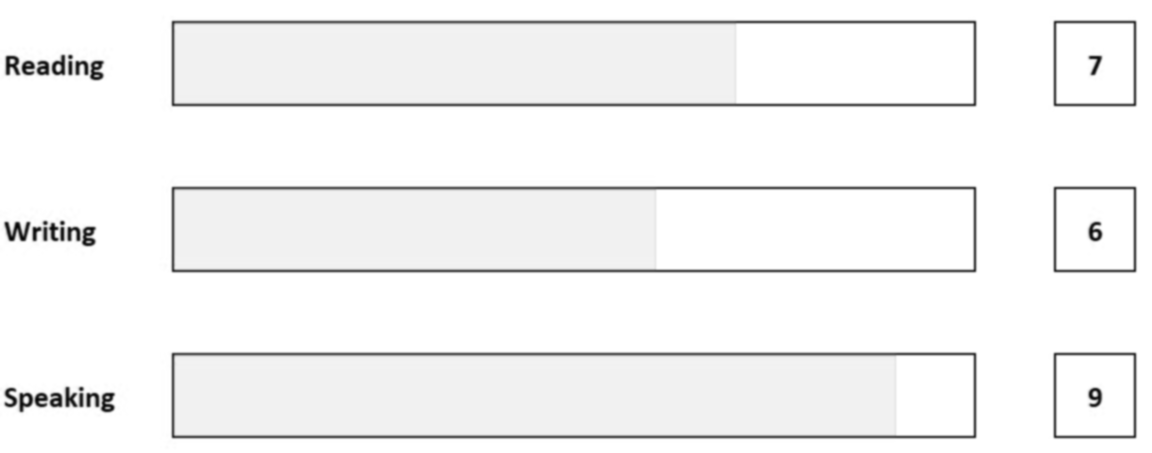

In [ ]:
import cv2
from matplotlib import pyplot as plt
import imutils
from google.colab.patches import cv2_imshow
# read image and take first channel only
bottle_3_channel = cv2.imread("/content/3-1.jpg")
bottle_gray = cv2.split(bottle_3_channel)[0]
cv2_imshow( bottle_gray)
cv2.waitKey(0)
# blur image-----
bottle_gray = cv2.GaussianBlur(bottle_gray, (5, 5), 1)
# Bottle Gray Smoothed 7 x 7"
cv2_imshow(bottle_gray)
# cv2.waitKey(0)

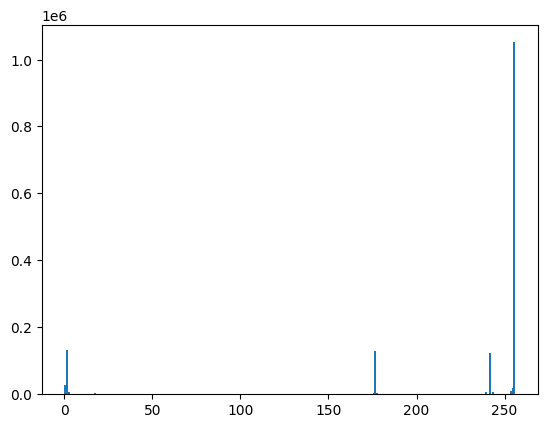

In [ ]:
# draw histogram
plt.hist(bottle_3_channel.ravel(), 256,[0, 256]); plt.show()


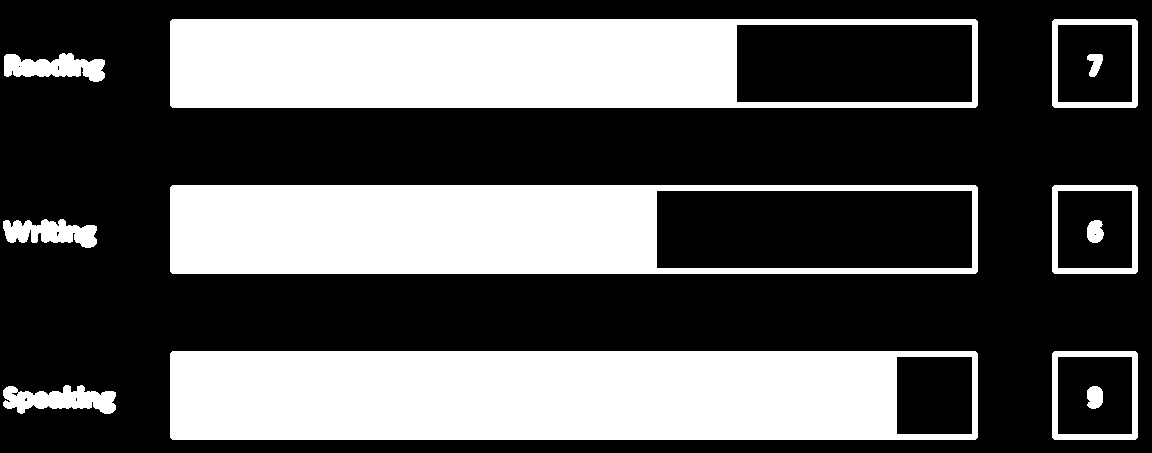

-1

In [ ]:
# manual threshold
(T, bottle_threshold) = cv2.threshold(bottle_gray, 245, 255, cv2.THRESH_BINARY_INV)
# "Bottle Gray Threshold 27.5",
cv2_imshow( bottle_threshold)
cv2.waitKey(0)


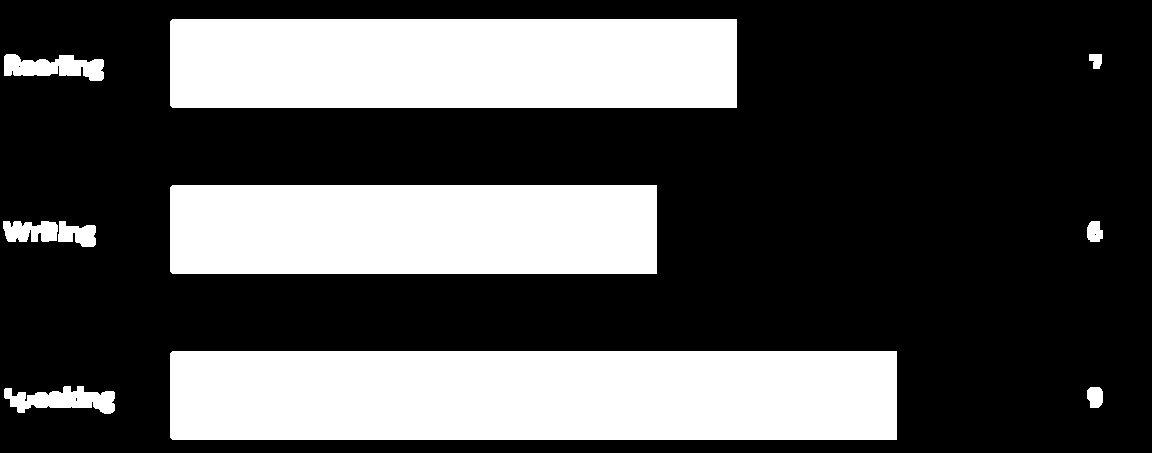

In [ ]:
# apply opening operation
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))
bottle_open = cv2.morphologyEx(bottle_threshold, cv2.MORPH_OPEN, kernel)
# "Bottle Open 5 x 5",
cv2_imshow( bottle_open)
# cv2.waitKey(0)

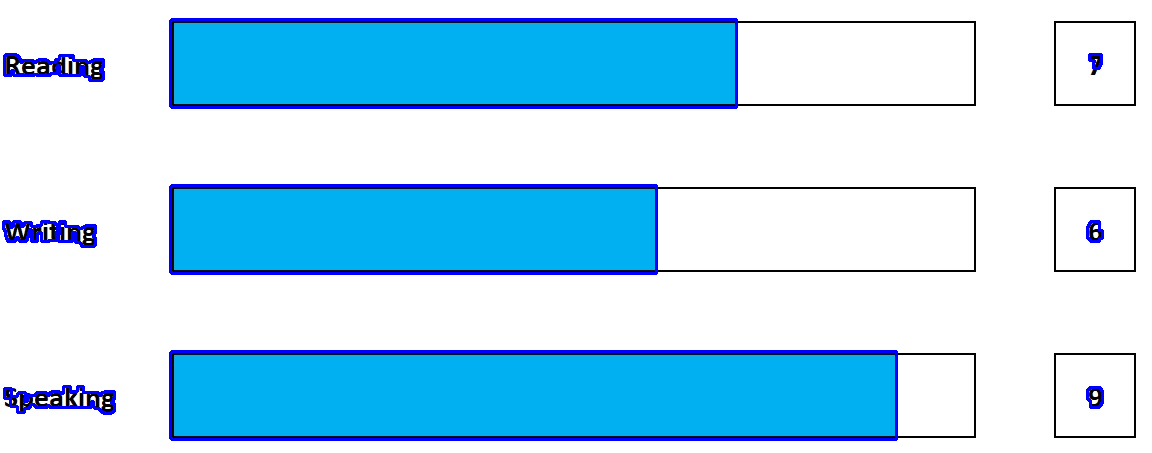

In [ ]:
# find all contours
contours = cv2.findContours(bottle_open.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)
bottle_clone = bottle_3_channel.copy()
cv2.drawContours(bottle_clone, contours, -1, (255, 0, 0), 2)
cv2.imwrite( "contours.jpg" , bottle_clone )
cv2_imshow( bottle_clone)


8.168539325842696 0
6.370786516853933 1
5.47191011235955 2


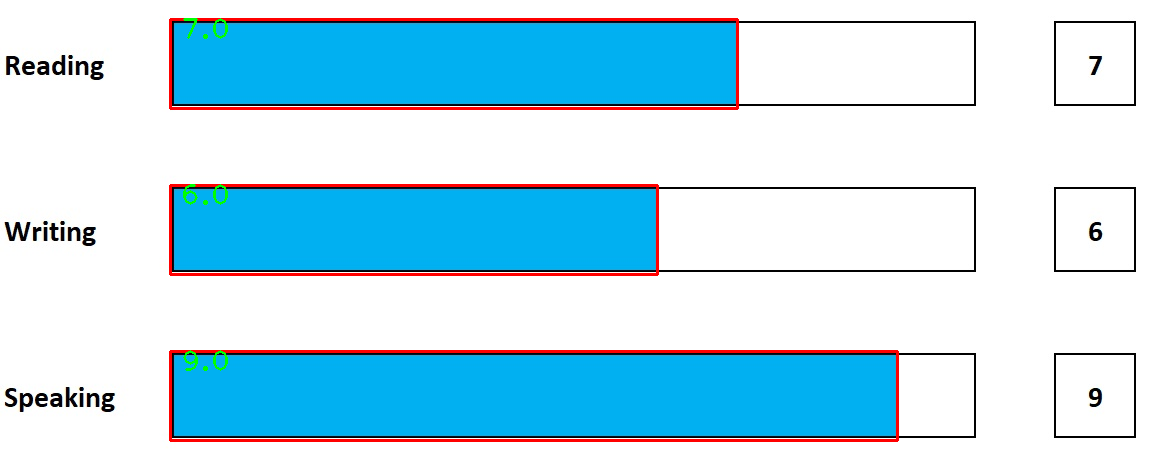

In [ ]:
bottle_clone = bottle_3_channel.copy()

# Sort contours by area
areas = [cv2.contourArea(contour) for contour in contours]
sorted_contours = [contour for _, contour in sorted(zip(areas, contours), key=lambda a: a[0], reverse=True)]

# Select the top three contours
top_contours = sorted_contours[:3]

for i, contour in enumerate(top_contours):
    (x, y, w, h) = cv2.boundingRect(contour)
    aspectRatio = w / float(h)
    label = str(round(aspectRatio,0)+1)
    print(aspectRatio , i)
    # if aspectRatio < 0.9:
    #     label = "Low"
    # elif aspectRatio < 2.0 and aspectRatio > 0.1:
    #     label = "Medium"
    # else:
    #     label = "Max"

    cv2.rectangle(bottle_clone, (x, y), (x + w, y + h), (0, 0, 255), 2)
    cv2.putText(bottle_clone, label, (x + 10, y + 20), cv2.FONT_HERSHEY_PLAIN, 2, (0, 255, 0), 2)

# Display the image with contour classifications
cv2_imshow(bottle_clone)


Question 04:

In [ ]:
import streamlit as st
import cv2
import numpy as np
import io
import imutils
st.title("Image Processing Software")

# Function to load an image
@st.cache_data()#allow_output_mutation=True)
def load_image(image):
    return cv2.imdecode(np.fromstring(image.read(), np.uint8), cv2.IMREAD_COLOR)

# Function to adjust brightness
@st.cache_data()#allow_output_mutation=True)
def adjust_brightness(image, factor):
    bright_image = cv2.convertScaleAbs(image, alpha=factor, beta=0)
    return bright_image

# Function to apply a logarithmic operation
@st.cache_data()#allow_output_mutation=True)
def apply_log(image, constant):
    log_image = np.log1p(image) / np.log(1 + constant)
    log_image = (255 * log_image).astype(np.uint8)
    return log_image

# Function to apply thresholding
@st.cache_data()#allow_output_mutation=True)
def apply_threshold(image, threshold_value):
    _, thresholded_image = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)
    return thresholded_image

# Function to draw shapes on the image
def draw_shapes(image, shape_type, start_point, end_point, color):
    if shape_type == "Rectangle":
        cv2.rectangle(image, start_point, end_point, color, 2)
    elif shape_type == "Circle":
        radius = int(np.sqrt((end_point[0] - start_point[0]) ** 2 + (end_point[1] - start_point[1]) ** 2))
        cv2.circle(image, start_point, radius, color, 2)

# Function to apply blurring with different filters
@st.cache_data()#allow_output_mutation=True)
def apply_blur(image, blur_type, kernel_size):
    if blur_type == "Gaussian":
        blurred_image = cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)
    elif blur_type == "Median":
        blurred_image = cv2.medianBlur(image, kernel_size)
    elif blur_type == "Average":
        kernel = np.ones((kernel_size, kernel_size), np.float32) / (kernel_size ** 2)
        blurred_image = cv2.filter2D(image, -1, kernel)
    return blurred_image

# Function to sharpen the image using Laplacian techniques
@st.cache_data()#allow_output_mutation=True)
def apply_sharpen_laplacian(image, kernel_size):
    laplacian = cv2.Laplacian(image, cv2.CV_64F)
    sharp_image = cv2.convertScaleAbs(image - laplacian)
    return sharp_image

# Function to implement Unsharp Masking
@st.cache_data()#allow_output_mutation=True)
def apply_unsharp_mask(image, kernel_size, alpha, beta):
    blurred_image = cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)
    unsharp_image = cv2.addWeighted(image, 1 + alpha, blurred_image, -beta, 0)
    return unsharp_image

# Upload an image
image = st.file_uploader("Upload an image", type=["jpg", "png", "jpeg"])
if image:
    image = load_image(image)
    st.image(image, caption="Uploaded Image", use_column_width=True)

if st.button("Adjust Brightness"):
    brightness_factor = st.slider("Brightness Factor", 0.1, 2.0, 1.0 , key= 'adjust-brightness')
    bright_result = adjust_brightness(image, brightness_factor)
    st.image(bright_result, caption="Brightness Adjusted", use_column_width=True)

if st.button("Apply Log Operation"):
    log_constant = st.slider("Log Constant", 1, 100, 1 , key = "log-op")
    log_result = apply_log(image, log_constant)
    st.image(log_result, caption="Log Operation Applied", use_column_width=True)

if st.button("Thresholding"):
    threshold_value = st.slider("Threshold Value", 0, 255, 127 , key="thr")
    thresholded_result = apply_threshold(image, threshold_value)
    st.image(thresholded_result, caption="Thresholding Applied", use_column_width=True)

# Allow users to draw shapes on the image
st.sidebar.header("Draw Shapes")
shape_type = st.sidebar.selectbox("Select Shape", ["Rectangle", "Circle"])
start_point = st.sidebar.text_input("Start Point (x, y)", "100, 100")
end_point = st.sidebar.text_input("End Point (x, y)", "200, 200")
color = st.sidebar.color_picker("Choose Color", "#FF0000")

start_point = tuple(map(int, start_point.split(", ")))
end_point = tuple(map(int, end_point.split(", ")))

if st.sidebar.button("Draw Shape"):
    draw_shapes(image, shape_type, start_point, end_point, color)
    st.image(image, caption="Image with Shapes", use_column_width=True)

# Apply blurring with different filters
st.sidebar.header("Apply Blurring")
blur_type = st.sidebar.selectbox("Select Blur Type", ["Gaussian", "Median", "Average"])
kernel_size = st.sidebar.slider("Kernel Size", 1, 31, 3 , key= 'blurring')

if st.sidebar.button("Apply Blur"):
    blurred_result = apply_blur(image, blur_type, kernel_size)
    st.image(blurred_result, caption="Blurred Image", use_column_width=True)
# Apply image sharpening using Laplacian techniques
if st.sidebar.button("Apply Sharpen (Laplacian)"):
    sharpened_result = apply_sharpen_laplacian(image, kernel_size)
    st.image(sharpened_result, caption="Sharpened Image (Laplacian)", use_column_width=True)

# Apply Unsharp Masking
st.sidebar.header("Unsharp Masking")
unsharp_kernel_size = st.sidebar.slider("Kernel Size", 1, 31, 3 , key = "Unsharp_masking" )
alpha = st.sidebar.slider("Alpha", 0.1, 5.0, 1.0)
beta = st.sidebar.slider("Beta", 0.1, 5.0, 1.0)

if st.sidebar.button("Apply Unsharp Masking"):
    unsharp_mask_result = apply_unsharp_mask(image, unsharp_kernel_size, alpha, beta)
    st.image(unsharp_mask_result, caption="Unsharp Masking Applied", use_column_width=True)


if st.button("Color-Based Segmentation"):
    lower_range = st.color_picker("Lower Range", "#FF0000")
    upper_range = st.color_picker("Upper Range", "#FFFF00")

    lower_bound = np.array(lower_range, dtype="uint8")
    upper_bound = np.array(upper_range, dtype="uint8")

    mask = cv2.inRange(image, lower_bound, upper_bound)
    segmented_image = cv2.bitwise_and(image, image, mask=mask)

    st.image(segmented_image, caption="Color-Based Segmentation", use_column_width=True)


if st.button("Detect Lines (Hough Transform)"):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray_image, 50, 150, apertureSize=3)
    lines = cv2.HoughLines(edges, 1, np.pi / 180, 100)

    if lines is not None:
        for rho, theta in lines[:, 0]:
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a * rho
            y0 = b * rho
            x1 = int(x0 + 1000 * (-b))
            y1 = int(y0 + 1000 * (a))
            x2 = int(x0 - 1000 * (-b))
            y2 = int(y0 - 1000 * (a))
            cv2.line(image, (x1, y1), (x2, y2), (0, 0, 255), 2)

    st.image(image, caption="Line Detection (Hough Transform)", use_column_width=True)


if st.button("Erode"):
    kernel_size = st.slider("Kernel Size", 1, 21, 3 , key="erode_slider")
    kernel = np.ones((kernel_size, kernel_size), np.uint8)
    eroded_image = cv2.erode(image, kernel, iterations=1)
    st.image(eroded_image, caption="Eroded Image", use_column_width=True)

if st.button("Dilate"):
    kernel_size = st.slider("Kernel Size", 1, 21, 3 , key="dilate_slider")
    kernel = np.ones((kernel_size, kernel_size), np.uint8)
    dilated_image = cv2.dilate(image, kernel, iterations=1)
    st.image(dilated_image, caption="Dilated Image", use_column_width=True)

if st.button("Open"):
    kernel_size = st.slider("Kernel Size", 1, 21, 3 , key="open_slider")
    kernel = np.ones((kernel_size, kernel_size), np.uint8)
    opened_image = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
    st.image(opened_image, caption="Opened Image", use_column_width=True)

if st.button("Close"):
    kernel_size = st.slider("Kernel Size", 1, 21, 3 , key="close_slider")
    kernel = np.ones((kernel_size, kernel_size), np.uint8)
    closed_image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
    st.image(closed_image, caption="Closed Image", use_column_width=True)



if st.button("Connected Component Analysis"):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, binary_image = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY)
    output_image = cv2.connectedComponentsWithStats(binary_image, 4, cv2.CV_32S)

    num_labels = output_image[0]
    labels = output_image[1]
    stats = output_image[2]
    centroids = output_image[3]

    for i in range(1, num_labels):
        area = stats[i, cv2.CC_STAT_AREA]
        if area > 100:  # Filter small components
            x, y = int(centroids[i][0]), int(centroids[i][1])
            cv2.putText(image, f"{i}", (x, y), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)

    st.image(image, caption="Connected Component Analysis", use_column_width=True)

if st.button("Detect Contours"):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, binary_image = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    for i, contour in enumerate(contours):
        area = cv2.contourArea(contour)
        if area > 100:  # Filter small contours
            perimeter = cv2.arcLength(contour, True)
            epsilon = 0.04 * perimeter
            approx = cv2.approxPolyDP(contour, epsilon, True)

            st.write(f"Object {i + 1}:")
            st.write(f"Area: {area}")
            st.write(f"Parameters: {len(approx)}")
            st.image(image, caption=f"Object {i + 1}", use_column_width=True, output_format="JPEG")


import time

def get_current_time():
    return time.strftime("%Y-%m-%d %H:%M:%S", time.localtime())

if st.button("Determine Time"):
    current_time = get_current_time()
    st.write(f"Current Time: {current_time}")


# --------------------------------------------
# Function for Image Matching
def match_input(image, template):
    # Convert the image and template to grayscale
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    w, h = template.shape[::-1]

    # Match the template in the image
    res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)
    threshold = 0.8
    loc = np.where(res >= threshold)

    # Draw rectangles around matched areas
    for pt in zip(*loc[::-1]):
        cv2.rectangle(image, pt, (pt[0] + w, pt[1] + h), (0, 0, 255), 2)

    return image

# Button to Match Input
if st.button("Match Input"):
    # Load the main image
    main_image = cv2.imread("D:\9th-Smstr\DIP\A2\data\data\q21-4.jpg")
    assert main_image is not None, "Main image could not be read."

    # Load the template image
    template_image = cv2.imread("D:\9th-Smstr\DIP\A2\data\data\cropped_patch.jpg", cv2.IMREAD_GRAYSCALE)
    assert template_image is not None, "Template image could not be read."

    # Call the matching function
    matched_image = match_input(main_image, template_image)

    # Display the result
    st.image(matched_image, caption="Matched Image", use_column_width=True)


# Function for Score Calculation
def calculate_score(image_path):
    # Read and preprocess the image
    bottle_3_channel = cv2.imread(image_path)
    bottle_gray = cv2.split(bottle_3_channel)[0]
    bottle_gray = cv2.GaussianBlur(bottle_gray, (5, 5), 1)

    # Apply thresholding
    (T, bottle_threshold) = cv2.threshold(bottle_gray, 245, 255, cv2.THRESH_BINARY_INV)

    # Apply opening operation
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))
    bottle_open = cv2.morphologyEx(bottle_threshold, cv2.MORPH_OPEN, kernel)

    # Find and sort contours by area
    contours = cv2.findContours(bottle_open.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    contours = imutils.grab_contours(contours)
    areas = [cv2.contourArea(contour) for contour in contours]
    sorted_contours = [contour for _, contour in sorted(zip(areas, contours), key=lambda a: a[0], reverse=True)]
    top_contours = sorted_contours[:3]

    scores = []
    for i, contour in enumerate(top_contours):
        (x, y, w, h) = cv2.boundingRect(contour)
        aspectRatio = w / float(h)
        score = round(aspectRatio, 0) + 1
        scores.append(score)

    # returb image tooo
    bottle_clone = bottle_3_channel.copy()
    cv2.drawContours(bottle_clone, contours, -1, (255, 0, 0), 2)

    return scores , bottle_clone

# Button for Score Calculation
if st.button("Score Calculation"):
    image_path = "D:\9th-Smstr\DIP\A2\data\data\q33-1.jpg"  # Replace with the path to your image
    scores , my_image  = calculate_score(image_path)

    st.write("Aspect Ratios and Scores:")
    for i, score in enumerate(scores):
        st.write(f"Object {i + 1}: Aspect Ratio = {score - 1}, Score = {score}")





# Save the output image
if st.button("Save Output Image"):
    st.image(image, caption="Saved Image", use_column_width=True, output_format="JPEG")

# Color conversion
if st.button("Convert to Grayscale"):
    grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    st.image(grayscale_image, caption="Grayscale Image", use_column_width=True)

if st.button("Convert to HSV"):
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    st.image(hsv_image, caption="HSV Image", use_column_width=True)
